<a href="https://colab.research.google.com/github/Abdelrhman2022/Intel-Classification-Using-CNN-SVM/blob/main/Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intel Classification Using CNN + SVM


In [6]:
#first to import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [1]:
# Connect to DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Config API of KAGGLE
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle_dataset'

In [3]:
#Dawnload Dataset From Kaglge
!kaggle datasets download -d puneet6060/intel-image-classification

 99% 342M/346M [00:06<00:00, 63.7MB/s]
100% 346M/346M [00:06<00:00, 51.9MB/s]


In [ ]:
# Unzip File
!unzip /content/intel-image-classification.zip

In [7]:
# Remove Zip File
os.remove("/content/intel-image-classification.zip")

In [10]:
# Set Dataset Folders
trainpath = '/content/seg_train/'
testpath = '/content/seg_test/'
predpath = '/content/seg_pred/'

In [14]:
# Count number of files in each category in Train folder

for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train/' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2191 in folder buildings
For training data , found 2271 in folder forest
For training data , found 2274 in folder sea
For training data , found 2382 in folder street
For training data , found 2404 in folder glacier
For training data , found 2512 in folder mountain


In [13]:
# Count number of files in each category in Test folder

for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test/' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 437 in folder buildings
For testing data , found 474 in folder forest
For testing data , found 510 in folder sea
For testing data , found 501 in folder street
For testing data , found 553 in folder glacier
For testing data , found 525 in folder mountain


In [15]:
# Count number of files in predict folder

files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


### Checking Images which need to check the images sizes, to know how they look like

In [16]:
# since we have 6 categories, we first need to create a dictionary with 
# their names & indices, also create a function to get the code back

code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x  

In [17]:
# show images sizes in train folder
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train/' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(111, 150, 3)        3
(135, 150, 3)        3
(123, 150, 3)        2
(143, 150, 3)        2
(146, 150, 3)        2
(134, 150, 3)        2
(142, 150, 3)        2
(144, 150, 3)        2
(136, 150, 3)        2
(108, 150, 3)        2
(140, 150, 3)        1
(120, 150, 3)        1
(147, 150, 3)        1
(100, 150, 3)        1
(145, 150, 3)        1
(81, 150, 3)         1
(141, 150, 3)        1
(103, 150, 3)        1
(131, 150, 3)        1
(97, 150, 3)         1
(110, 150, 3)        1
(76, 150, 3)         1
(105, 150, 3)        1
(102, 150, 3)        1
(124, 150, 3)        1
(115, 150, 3)        1
(119, 150, 3)        1
(133, 150, 3)        1
(149, 150, 3)        1
dtype: int64

### Almost all of them are (150,150,3)

In [18]:
# show images sizes in train folder
size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(141, 150, 3)       1
(76, 150, 3)        1
(149, 150, 3)       1
(110, 150, 3)       1
(72, 150, 3)        1
(81, 150, 3)        1
(131, 150, 3)       1
dtype: int64

### Fine, since almost all of the images are (150,150,3), we can feel comfortable in using all pictures in our model, after resizing it in a specific amount

## Reading Dataset
**first we'll create a variable s , which refer to size , so we can change it easily**


In [19]:
# let's use now size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training
s = 100

In [20]:
# To read all images in six categories in training folder, use OpenCV to resize it, 
# and not to forget to assign the y value , from the predefined function

X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [25]:
# Count images in y_train

print(f'Fouud {len(y_train)} Images in y_train')

Fouud 14034 Images in y_train


In [27]:
# Handle Test set
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [31]:
# Count images in Y_test
print(f'Found {len(y_test)} items in y_test')

Found 3000 items in y_test


In [30]:
# Read predict images 

X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))   

In [32]:
# Count images in X_pred
print(f'Found {len(X_pred)} items in X_pred')

Found 7301 items in X_pred


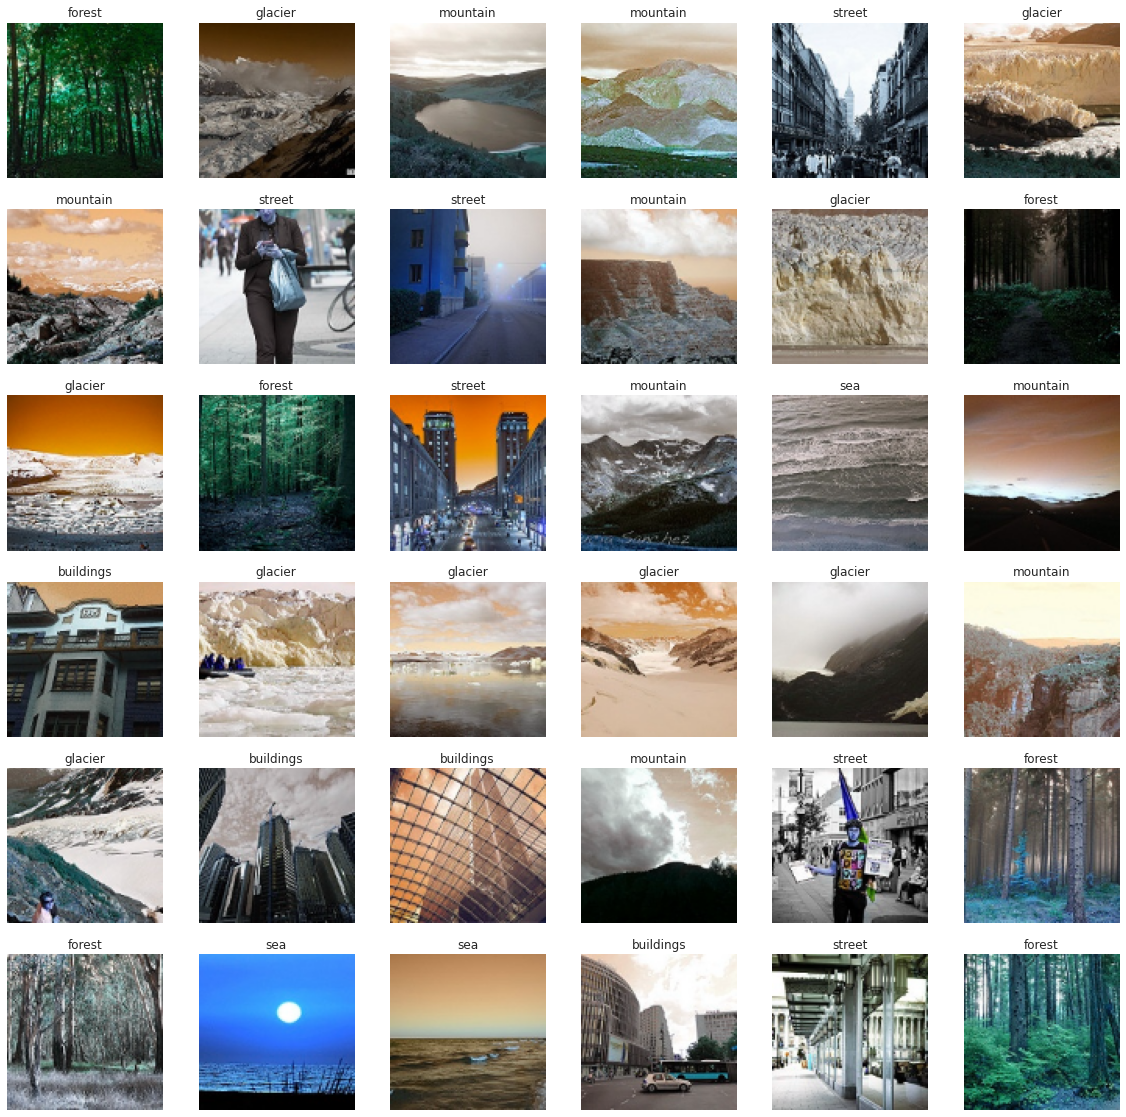

In [26]:
# Show random images in X_train, and adjust their title using the y value
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

# Building The Model

In [33]:
# Convert the data into arrays using numpy

X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (14034, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
X_pred shape  is (7301, 100, 100, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)


In [37]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.applications.vgg16 import VGG16

In [36]:
"""
Build model using pretrained weights (VGG16) 
as feature extractors for traditional machine learning classifiers (Random Forest). 
"""

'\nBuild model using pretrained weights (VGG16) \nas feature extractors for traditional machine learning classifiers (Random Forest). \n'

In [39]:
# Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_test)
y_test = le.transform(y_test)
le.fit(y_train)
y_train = le.transform(y_train)

In [43]:
# Normalize pixel values to between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [44]:
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(s, s, 3))

58900480/58889256 [==============================] - 2s 0us/step


In [45]:

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False #Trainable parameters will be 0
    
VGG_model.summary()  

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [46]:
# Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(X_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features #This is our X input to RF

In [50]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding


RandomForestClassifier(random_state=42)

In [51]:
# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(X_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

array([5, 0, 0, ..., 3, 3, 3])

In [52]:
# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_RF))

Accuracy =  0.694


In [ ]:
# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)